## Import Libraries 

In [209]:
# Import the Libraries 
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import dates as mlp_dates
from datetime import datetime


# Task I

## Part a) Explore & Prepare Data 

### i)Explore the data and provide details on all fields retrieved. 

In [210]:
# Import and display the dataset
df = pd.read_csv("COMP4621_SalesRecords03.csv")

In [211]:
# View the shape of the dataset. 
df.shape

(203318, 14)

In [212]:
#View the first 5 rows of the dataset. 
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Yemen,Beverages,Online,M,12/5/2016,787713563.0,12/8/2016,803.0,47.45,31.79,38102.35,25527.37,12574.98
1,Australia and Oceania,Solomon Islands,Cosmetics,Online,M,4/27/2016,465821444.0,5/18/2016,5772.0,437.20,263.33,2523518.40,1519940.76,1003577.64
2,Middle East and North Africa,Egypt,Fruits,Offline,M,5/26/2017,230460393.0,6/5/2017,7206.0,9.33,6.92,67231.98,49865.52,17366.46
3,Sub-Saharan Africa,Eritrea,Meat,Online,L,10/15/2016,837929236.0,11/4/2016,737.0,421.89,364.69,310932.93,268776.53,42156.40
4,Europe,Ukraine,Clothes,Offline,M,2/29/2012,864839303.0,3/10/2012,4023.0,109.28,35.84,439633.44,144184.32,295449.12


In [213]:
#View the data types of each column.
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID          float64
Ship Date          object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

The dataset consists of 203,318 rows and 14 columns, representing sales transactions across multiple regions and countries. Initial inspection indicates a mix of categorical (object) and numeric (float) data types. Columns such as 'Region', 'Country', 'Item Type', 'Sales Channel' and 'Order Priority' are stored as object types and represent nominal categorical data. These fields may be converted to categorical data types at a later stage for efficiency. 'Order ID' field is stored as a float instead of a unique numerical value. This is not ideal however, the field is not required for analysis and therefore will not be used. It is noted that 'Ship Date' and 'Order Date' are stored as object types, these will need to be convertef to support time based analysis. Finally, the numeric fields 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost' and 'Total Profit' are stored as floats which is suitable for financial data. 

Further inspection is needed to assess missing values and potential anomalies. 


### ii) Fix noise, outliers, missing values and any other issues.

#### Order ID Column 

In [214]:
# Drop the Order ID column 
df = df.drop(columns=['Order ID'])

In [215]:
# View the datafranme to see that it has been removed.
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Yemen,Beverages,Online,M,12/5/2016,12/8/2016,803.0,47.45,31.79,38102.35,25527.37,12574.98
1,Australia and Oceania,Solomon Islands,Cosmetics,Online,M,4/27/2016,5/18/2016,5772.0,437.20,263.33,2523518.40,1519940.76,1003577.64
2,Middle East and North Africa,Egypt,Fruits,Offline,M,5/26/2017,6/5/2017,7206.0,9.33,6.92,67231.98,49865.52,17366.46
3,Sub-Saharan Africa,Eritrea,Meat,Online,L,10/15/2016,11/4/2016,737.0,421.89,364.69,310932.93,268776.53,42156.40
4,Europe,Ukraine,Clothes,Offline,M,2/29/2012,3/10/2012,4023.0,109.28,35.84,439633.44,144184.32,295449.12


The Order ID column was removed from the dataset as it represents an identifier rather than a quantitative attribute. Retaining this field provides no analytical benefit and may distort numeric summaries if included in statistical operations. It was removed to ensure that subsequent analysis focuses only on meaningful variables.

#### Date Columns

In [216]:
# Convert the date columns using date time. 
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [217]:
# Check to ensure the conversion was carried out.
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold               float64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [218]:
# View the missing values in the column. 
df['Order Date'].isna().sum()

np.int64(456)

In [219]:
df['Ship Date'].isna().sum()

np.int64(307)

In [220]:
# Drop the empty values in the date columns. 
df = df.dropna(subset=['Order Date'])
df = df.dropna(subset=['Ship Date'])

In [221]:
# Check that the invalid entries were removed
df['Order Date'].isna().sum()

np.int64(0)

In [222]:
df['Ship Date'].isna().sum()

np.int64(0)

Records with missing 'Order Date' and 'Ship Date' values were removed from the dataset. These could not be reliably assigned to a time period, and the proportion of affected records were minimal relative to the overall dataset size. Removing them avoids bias and ensures accuracy in time-based analyses.

#### Object Type Columns 

In [223]:
# Identify the object-type columns
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority'], dtype='object')

In [224]:
# Check for Noise in the Region column. 
df['Region'].value_counts(dropna=False).head(50)

Region
Sub-Saharan Africa                   52636
Europe                               52399
Asia                                 29504
Middle East and North Africa         25365
Central America and the Caribbean    21851
Australia and Oceania                16337
North America                         4443
St. Ann                                 20
Name: count, dtype: int64

An inspection of the Region field revealed mostly consistent global regional categories. However, one low-frequency value "St. Ann” was observed, which differs in geographic level from the other region-level classifications. This value is a potential source of noise for further consideration during the cleaning stage.

In [225]:
# Check for Noise in the Country column. 
df['Country'].value_counts(dropna=False).head(50)

Country
Bahrain                     1185
Algeria                     1159
Croatia                     1150
Fiji                        1145
Seychelles                  1145
Somalia                     1143
Montenegro                  1143
Tanzania                    1142
Mali                        1139
Malaysia                    1139
Djibouti                    1139
Guinea                      1136
South Sudan                 1135
Chad                        1135
Panama                      1135
Ethiopia                    1133
Central African Republic    1133
Belgium                     1133
Mexico                      1130
Lesotho                     1130
Morocco                     1129
Brunei                      1129
Myanmar                     1128
Comoros                     1126
Zimbabwe                    1126
Australia                   1125
Singapore                   1125
Burkina Faso                1124
Slovenia                    1124
Qatar                       1124
Ar

An inspection of the Country field highlighted consistent values wuth country names. No evidence of inconsistent entries. 

In [226]:
# Check for Noise in the Region column. 
df['Item Type'].value_counts(dropna=False).head(50)

Item Type
Personal Care      16982
Baby Food          16944
Cosmetics          16932
Office Supplies    16924
Beverages          16918
Vegetables         16908
Snacks             16886
Clothes            16884
Fruits             16822
Household          16785
Cereal             16778
Meat               16736
NaN                   56
Name: count, dtype: int64

An inspection of the Item Type field highlighted consistent values with product types. Only missing values were highlighted, and should be addressed. 

In [227]:
# Check for Noise in the Region column. 
df['Sales Channel'].value_counts(dropna=False).head(50)

Sales Channel
Offline    101418
Online     101081
NaN            56
Name: count, dtype: int64

An inspection of the Sales Channel field highlighted consistent values with channel type. Only missing values were highlighted, and should be addressed. 

In [228]:
# Check for Noise in the Region column. 
df['Order Priority'].value_counts(dropna=False).head(50)

Order Priority
H    50903
C    50865
L    50429
M    50358
Name: count, dtype: int64

There appear to be no missing values or invalid entries in this column. 

#### Object Type Columns - Missing Values  

In [229]:
# View the data before removing
df.isna().sum()

Region              0
Country             0
Item Type          56
Sales Channel      56
Order Priority      0
Order Date          0
Ship Date           0
Units Sold         93
Unit Price        294
Unit Cost         310
Total Revenue     326
Total Cost         27
Total Profit       27
dtype: int64

In [230]:
# Remove the missing rows in the columns with missing data. 
df = df.dropna(subset=["Item Type"])
df = df.dropna(subset=["Sales Channel"])

In [231]:
# View the data after removing
df.isna().sum()

Region              0
Country             0
Item Type           0
Sales Channel       0
Order Priority      0
Order Date          0
Ship Date           0
Units Sold         56
Unit Price        294
Unit Cost         310
Total Revenue     326
Total Cost         27
Total Profit       27
dtype: int64

Rows with missing categorical values were removed instead of filled to avoid introducing artificial categories with no domain meaning, especially given the minimal number of affected records.

#### Object Type Column - Region 

From previous analysis of the Region column, 'St. Ann' returned 20 entries. We first should view these entires before deciding how to address them. 

In [232]:
# View the shape of Region where entries is equal to shape
st_ann_df = df[df['Region'] == 'St. Ann']
st_ann_df.shape

(20, 13)

In [233]:
# View the country column with St Ann as the region identifier.
st_ann_df['Country'].value_counts()

Country
Cyprus            3
Finland           2
Netherlands       1
Lithuania         1
Greece            1
Czech Republic    1
Belgium           1
Bulgaria          1
Slovenia          1
Hungary           1
Armenia           1
Kosovo            1
Montenegro        1
Moldova           1
Austria           1
Estonia           1
Monaco            1
Name: count, dtype: int64

All the listed countries are European or commonly classified with the European region. The countries above do not correspond to the other regions identified in previous analysis. 

As the value of 'St.Ann' is inconsistent, we can reassign these entries to the 'Europe' existing region. 

In [234]:
# Reassign the region 'St. Ann' to 'Europe'%
df.loc[df['Region'] == 'St. Ann', 'Region'] = 'Europe'       

In [235]:
# Verify reassignment was done
df['Region'].value_counts()

Region
Sub-Saharan Africa                   52623
Europe                               52403
Asia                                 29500
Middle East and North Africa         25359
Central America and the Caribbean    21841
Australia and Oceania                16332
North America                         4441
Name: count, dtype: int64

#### Object Type Conversion

In order to determine which object type can be converted to category, we first check the unique entires in the columns. If it returns and objectively low amount in comparison to the total data set, it can be converted. 

In [236]:
# Check the unique entries in the object type columns.
df.select_dtypes(include='object').nunique()

Region              7
Country           186
Item Type          12
Sales Channel       2
Order Priority      4
dtype: int64

The Country column contains a large number of unique values (186 different countries). Unlike other categorical fields such as Region or Item Type, this column has high cardinality, meaning that most values occur relatively infrequently. Converting this column to a categorical data type would provide little practical benefit and could reduce flexibility when grouping or filtering by country. Therefore, the Country field was left as an object type, while columns with fewer, well-defined categories were converted to categorical data types.


In [237]:
# Convert the respective columns to category type. 
cat_cols = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [238]:
# View the data type to ensure conversion
df.dtypes

Region                  category
Country                   object
Item Type               category
Sales Channel           category
Order Priority          category
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold               float64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

#### Numeric Type Columns

##### Numeric Overview

In [239]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

In [240]:
# Missing Values 
df[num_cols].isna().sum()

Units Sold        56
Unit Price       294
Unit Cost        310
Total Revenue    326
Total Cost        27
Total Profit      27
dtype: int64

All numeric columns were reviewed, and they have a relationship and as such mathematical calculations can be applied to replace missing values. This is because several numeric variables in the dataset are mathematically dependent on each another (for example, Units Sold, Unit Price, Total Revenue, Total Cost, and Total Profit).

##### Units Sold

In [241]:
 # Inspect distribution
df["Units Sold"].describe()

count    202443.000000
mean       5002.460816
std        2883.498507
min           1.000000
25%        2512.500000
50%        5009.000000
75%        7491.000000
max       10000.000000
Name: Units Sold, dtype: float64

In [242]:
# Noise Check: Zero units sold with positive revenue (illogical)
df[(df['Units Sold'] == 0) & (df['Total Revenue'] > 0)].shape

(0, 13)

In [243]:
# Check missing values
df["Units Sold"].isna().sum()

np.int64(56)

In [244]:
# Work with non-missing values for statistics
US = df["Units Sold"].dropna()

US_mean = US.mean()
US_std = US.std()

lower = US_mean - 3 * US_std
upper = US_mean + 3 * US_std



In [245]:
# Identify potential outliers
outliers = df[(df["Units Sold"] < lower) | (df["Units Sold"] > upper)]
outliers.shape

(0, 13)

##### Unit Price

In [246]:
 # Inspect distribution
df["Unit Price"].describe()

count    202205.000000
mean        265.943600
std         216.944546
min           9.330000
25%          81.730000
50%         154.060000
75%         437.200000
max         668.270000
Name: Unit Price, dtype: float64

In [247]:
# Noice Check: Positive revenue with zero price (illogical)
df[(df['Unit Price'] == 0) & (df['Total Revenue'] > 0)].shape

(0, 13)

In [248]:
# Check missing values
df["Unit Price"].isna().sum()

np.int64(294)

In [249]:
# Work with non-missing values for statistics
UP = df["Unit Price"].dropna()

UP_mean = UP.mean()
UP_std = UP.std()

lower = UP_mean - 3 * UP_std
upper = UP_mean + 3 * UP_std

In [250]:
# Identify potential outliers
outliers = df[(df["Unit Price"] < lower) | (df["Unit Price"] > upper)]
outliers.shape

(0, 13)

##### Unit Cost 

In [251]:
# Inspect distribution
df["Unit Cost"].describe()

count    202189.000000
mean        187.428234
std         175.616514
min           6.920000
25%          56.670000
50%          97.440000
75%         263.330000
max         524.960000
Name: Unit Cost, dtype: float64

In [252]:
# Noise Check: Zero cost with positive units sold
df[(df['Unit Cost'] == 0) & (df['Units Sold'] > 0)].shape

(0, 13)

In [253]:
# Check missing values
df["Unit Cost"].isna().sum()

np.int64(310)

In [254]:
# Work with non-missing values for statistics
UC = df["Unit Cost"].dropna()

UC_mean = UC.mean()
UC_std = UC.std()

lower = UC_mean - 3 * UC_std
upper = UC_mean + 3 * UC_std

In [255]:
# Identify potential outliers
outliers = df[(df["Unit Cost"] < lower) | (df["Unit Cost"] > upper)]
outliers.shape

(0, 13)

##### Total Revenue 

In [256]:
# Inspect distribution
df["Total Revenue"].describe()

count    2.021730e+05
mean     1.330700e+06
std      1.471266e+06
min      9.330000e+00
25%      2.788628e+05
50%      7.825828e+05
75%      1.824559e+06
max      6.682700e+06
Name: Total Revenue, dtype: float64

In [257]:
# Noise Check: Revenue inconsistent with Units Sold and Unit Price
calc_rev = df['Units Sold'] * df['Unit Price']
(df['Total Revenue'] < 0).sum()

np.int64(0)

In [258]:
# Noise Check: Zero cost with positive units sold
df[(df['Unit Cost'] == 0) & (df['Units Sold'] > 0)].shape

(0, 13)

In [259]:
# Check missing values
df["Total Revenue"].isna().sum()

np.int64(326)

In [260]:
# Work with non-missing values for statistics
TR = df["Total Revenue"].dropna()

TR_mean = TR.mean()
TR_std = TR.std()

lower = TR_mean - 3 * TR_std
upper = TR_mean + 3 * TR_std

In [261]:
# Identify potential outliers
outliers = df[(df["Total Revenue"] < lower) | (df["Total Revenue"] > upper)]
outliers.shape

(4422, 13)

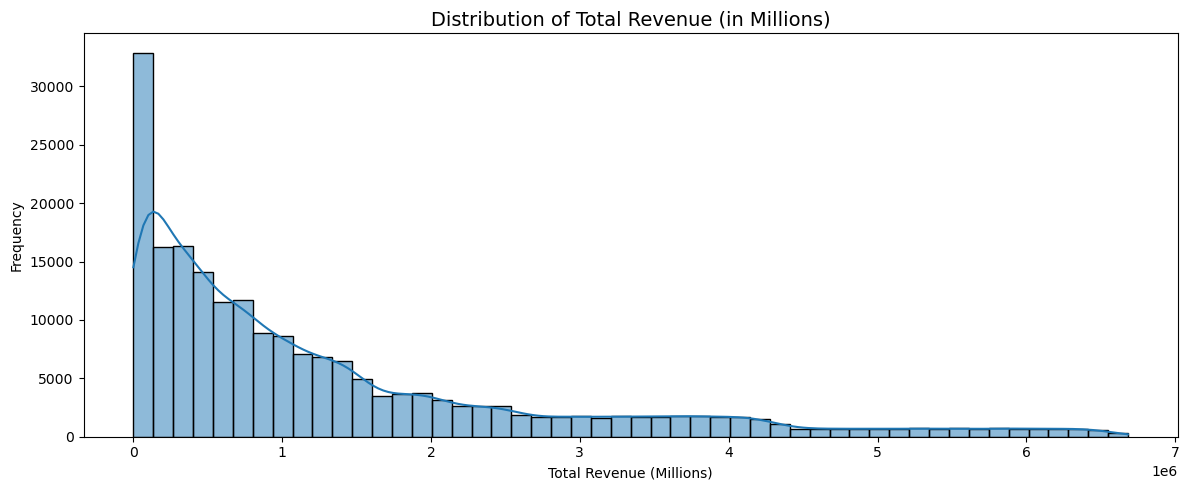

In [262]:
# Distribution Graph of Total Revenue Column
plt.figure(figsize=(12,5))
sns.histplot(df["Total Revenue"].dropna(),bins=50,kde=True)
plt.title("Distribution of Total Revenue (in Millions)", fontsize=14)
plt.xlabel("Total Revenue (Millions)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Using a standard deviation of +- 3, a number of high-value observations were flagged as potential outliers in the Total Revenue column. These values represent a small proportion of the dataset and are consistent with expected high-volume sales transactions. As such, they were retained, as they provide meaningful insight into revenue distribution rather than representing data errors.

##### Total Cost

In [263]:
# Inspect distribution
df["Total Cost"].describe()

count    2.024720e+05
mean     9.381605e+05
std      1.151319e+06
min      6.920000e+00
25%      1.620195e+05
50%      4.661025e+05
75%      1.194303e+06
max      5.249600e+06
Name: Total Cost, dtype: float64

In [264]:
# Nosie Check
(df['Total Cost'] < 0).sum()
df[(df['Total Cost'] == 0) & (df['Units Sold'] > 0)].shape

(0, 13)

In [265]:
# Check missing values
df["Total Cost"].isna().sum()

np.int64(27)

In [266]:
# Work with non-missing values for statistics
TC = df["Total Cost"].dropna()

TC_mean = TC.mean()
TC_std = TC.std()

lower = TC_mean - 3 * TC_std
upper = TC_mean + 3 * TC_std

In [267]:
# Identify potential outliers
outliers = df[(df["Total Cost"] < lower) | (df["Total Cost"] > upper)]
outliers.shape

(4886, 13)

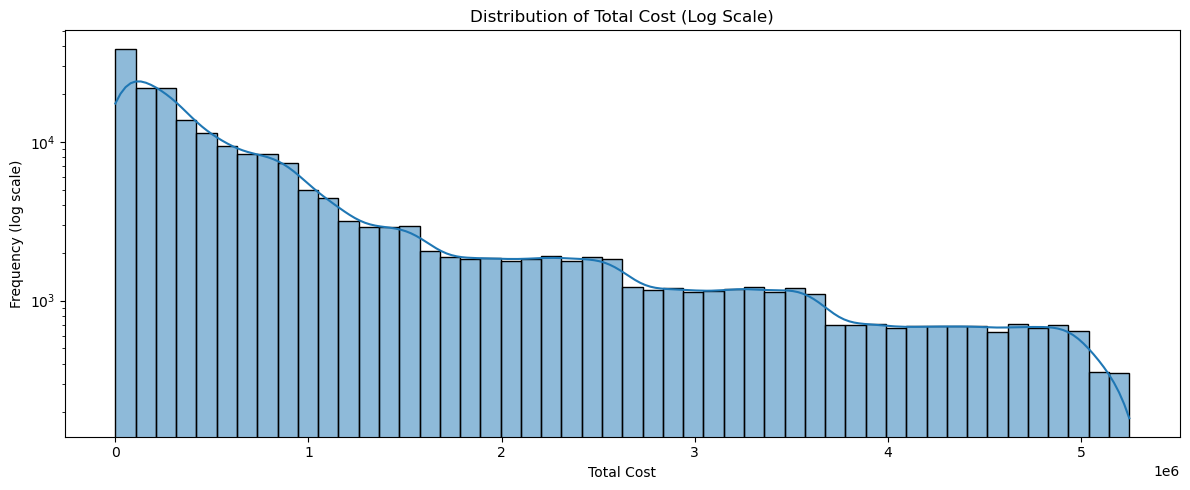

In [268]:
# Distribution Graph of Total Cost Column
plt.figure(figsize=(12,5))
sns.histplot(df["Total Cost"].dropna(), bins=50, kde=True)
plt.yscale("log")
plt.title("Distribution of Total Cost (Log Scale)")
plt.xlabel("Total Cost")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()
plt.show()

##### Total Profit 

In [269]:
# Inspect distribution
df["Total Profit"].describe()

count    2.024720e+05
mean     3.924800e+05
std      3.790278e+05
min      2.410000e+00
25%      9.558676e+04
50%      2.805948e+05
75%      5.643822e+05
max      1.738700e+06
Name: Total Profit, dtype: float64

In [270]:
# Noise Check: Zero cost or revenue with positive sales
df[(df['Total Profit'] != 0) & (df['Total Revenue'] == 0) & (df['Total Cost'] == 0)].shape

(0, 13)

In [271]:
# Check missing values
df["Total Profit"].isna().sum()

np.int64(27)

In [272]:
# Work with non-missing values for statistics
TP = df["Total Profit"].dropna()

TP_mean = TP.mean()
TP_std = TP.std()

lower = TP_mean - 3 * TP_std
upper = TP_mean + 3 * TP_std

In [273]:
# Identify potential outliers
outliers = df[(df["Total Profit"] < lower) | (df["Total Profit"] > upper)]
outliers.shape

(3281, 13)

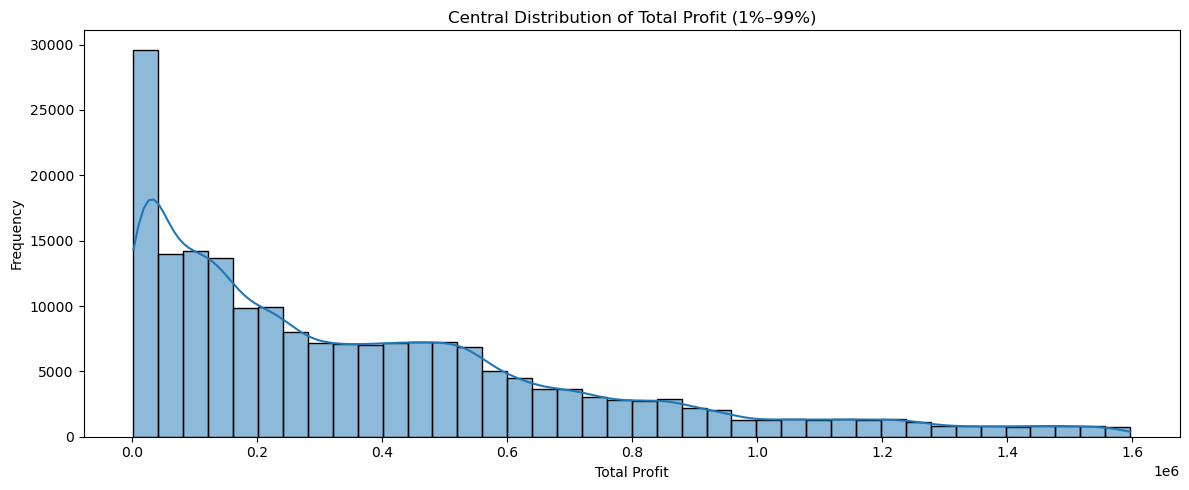

In [274]:
# Distribution Graph of Total Profit Column
p_low = df["Total Profit"].quantile(0.01)
p_high = df["Total Profit"].quantile(0.99)

plt.figure(figsize=(12,5))
sns.histplot(
    df.loc[(df["Total Profit"] >= p_low) & (df["Total Profit"] <= p_high), "Total Profit"],
    bins=40,
    kde=True
)
plt.title("Central Distribution of Total Profit (1%–99%)")
plt.xlabel("Total Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Numeric Columns Analysis Summary

##### Noise & Outlier 
All numeric variables were examined for potential noise using logical validity and internal consistency checks prior to addressing missing values or outliers. 

For quantity and price-related fields (Units Sold, Unit Price, and Unit Cost), values less than or equal to zero were flagged as invalid, as sales transactions require positive quantities and prices. 
    
For aggregate monetary fields (Total Revenue, Total Cost and Total Profit), negative values and zero totals associated with positive unit sales were identified as potential noise.

The Total Profit column was assessed using consistency checks rather than sign-based thresholds, as negative profit values represent legitimate loss-making transactions.

These validation steps ensured that numeric values were logically sound before proceeding with missing value replacement and outlier analysis.

##### Aggregrate Columns SUmmary 

The distributions of total revenue, total cost, and total profit exhibit similar right-skewed shapes due to their mathematical dependence on units sold and pricing variables. This similarity is expected in transactional sales data. To improve interpretability, alternative visual scales and focused ranges were used to highlight differences in spread and concentration rather than overall shape.

#### Replace Missing Entries using Math Calculations

Units sold can be calculated using total revenue and unit price by dividing revenue by price. Total revenue is derived from the product of units sold and unit price, while total cost is calculated as units sold multiplied by unit cost. Total profit is then determined by subtracting total cost from total revenue.

##### Fill Units Sold 

In [275]:
# Calculate possible Units Sold values
units_from_revenue = df['Total Revenue'] / df['Unit Price']
units_from_cost = df['Total Cost'] / df['Unit Cost']

In [276]:
# Fill missing Units Sold using available calculations
df['Units Sold'] = (
    df['Units Sold']
    .fillna(units_from_revenue)
    .fillna(units_from_cost)
)

In [277]:
# Check dataframe for missing values
df.isna().sum()

Region              0
Country             0
Item Type           0
Sales Channel       0
Order Priority      0
Order Date          0
Ship Date           0
Units Sold          0
Unit Price        294
Unit Cost         310
Total Revenue     326
Total Cost         27
Total Profit       27
dtype: int64

##### Fill Total Revnue 

In [278]:
# Calculate possible Total Revenue values
revenue_from_units = df['Units Sold'] * df['Unit Price']

In [279]:
# Fill missing Total Revenue using available calculations
df['Total Revenue'] = (
    df['Total Revenue']
    .fillna(revenue_from_units)
)

In [280]:
# Check dataframe for missing values
df.isna().sum()

Region              0
Country             0
Item Type           0
Sales Channel       0
Order Priority      0
Order Date          0
Ship Date           0
Units Sold          0
Unit Price        294
Unit Cost         310
Total Revenue     167
Total Cost         27
Total Profit       27
dtype: int64

#### Fill Total Cost 

In [281]:
# Calculate possible Total Cost values
cost_from_units = df['Units Sold'] * df['Unit Cost']

In [282]:
# Fill missing Total Cost using available calculations
df['Total Cost'] = (
    df['Total Cost']
    .fillna(cost_from_units)
)

In [283]:
# Check dataframe for missing values
df.isna().sum()

Region              0
Country             0
Item Type           0
Sales Channel       0
Order Priority      0
Order Date          0
Ship Date           0
Units Sold          0
Unit Price        294
Unit Cost         310
Total Revenue     167
Total Cost          0
Total Profit       27
dtype: int64

##### Fill Total Profit 

In [284]:
# Calculate possible Total Profit values
profit_from_totals = df['Total Revenue'] - df['Total Cost']

In [285]:
# Fill missing Total Profit using available calculations
df['Total Profit'] = (
    df['Total Profit']
    .fillna(profit_from_totals)
)

In [286]:
# Check dataframe for missing values
df.isna().sum()

Region              0
Country             0
Item Type           0
Sales Channel       0
Order Priority      0
Order Date          0
Ship Date           0
Units Sold          0
Unit Price        294
Unit Cost         310
Total Revenue     167
Total Cost          0
Total Profit        0
dtype: int64

Missing numeric values were replaced using calculations based on  relationships between variables, applying a consistent two-step approach across all derived fields.

Unit price and unit cost were treated as base variables and were not reconstructed mathematically to avoid introducing assumptions or circular calculations. Records with missing values in these fields were therefore excluded.

In [287]:
# Drop Missing Rows in Unit Price and Unit Cost
df = df.dropna(subset=['Unit Price', 'Unit Cost'])

In [288]:
# Check dataframe for missing values
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Some total revenue values could not be reconstructed due to missing unit-level price information. Once records with missing base variables were removed, all derived monetary fields became complete, ensuring consistency across the dataset.

## Part b) Analysis & Recommendations 

### i) What is the average spend on vegetables vs. meat in each region?

In the dataset, spend is defined as the product of units sold and unit price, which is already represented by the Total Revenue field. Therefore, total revenue is used as the measure of spend in the analysis.

In [289]:
# Filter Vegetables and Meat 
veg_meat = df[df['Item Type'].isin(['Vegetables', 'Meat'])].copy()

In [290]:
# Avg spend by region using Total Revenue 
avg_spend_region = (
    veg_meat
    .groupby(['Region', 'Item Type'], observed=True)['Total Revenue']
    .mean()
    .unstack()
    .round(2)
)

avg_spend_region

Item Type,Meat,Vegetables
Region,,
Asia,2168989.65,770264.22
Australia and Oceania,2113629.00,779804.98
Central America and the Caribbean,2062596.37,759772.45
Europe,2119066.21,761475.72
Middle East and North Africa,2095343.48,751593.72
North America,2088322.52,761317.63
Sub-Saharan Africa,2122276.29,773984.49


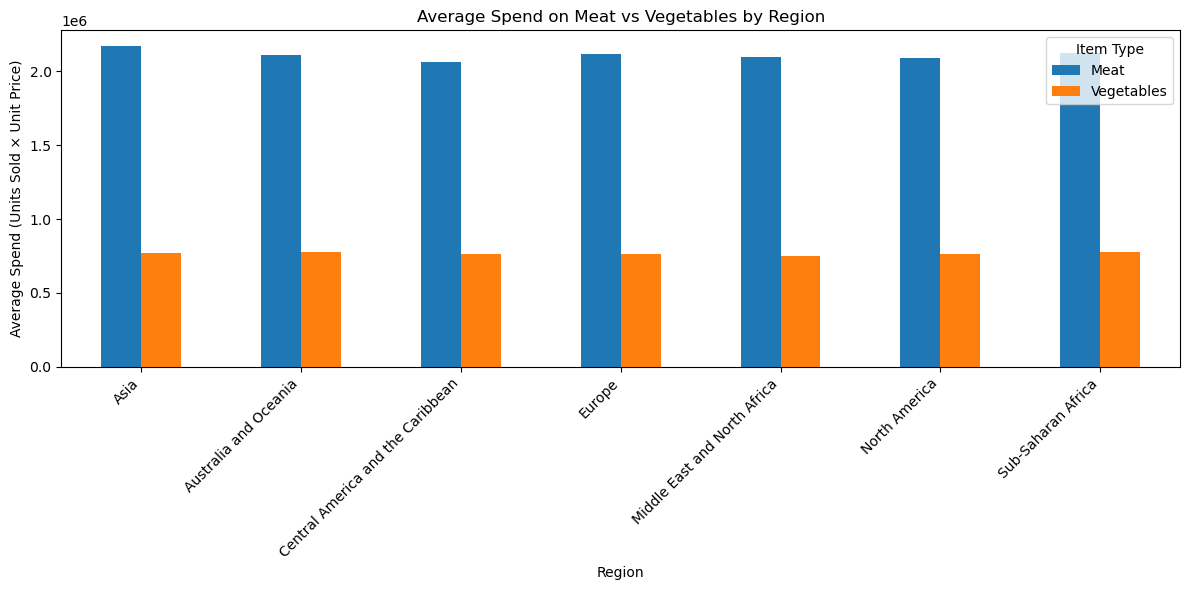

In [291]:
#Display the results 
avg_spend_region.plot(
    kind='bar',
    figsize=(12,6)
)

plt.title('Average Spend on Meat vs Vegetables by Region')
plt.xlabel('Region')
plt.ylabel('Average Spend (Units Sold × Unit Price)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()

Average spend on meat is consistently higher than vegetables across all regions. Although overall spending levels vary slightly by region, the gap between meat and vegetable spend is highly distinguishable, indicating stronger revenue contribution from meat sales.

### ii) Which country has the highest spending on vegetables?

In [292]:
# Filter to vegetables only 
veg_only = df[df['Item Type'] == 'Vegetables']

In [293]:
# Country with the most spent on vegetables 
top_veg_country = (
    veg_only
    .groupby('Country', observed=True)['Total Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

top_veg_country

Country
Uzbekistan    94513653.16
Name: Total Revenue, dtype: float64

Total spending on vegetables was calculated by summing total revenue for each country. The results show that Uzbekistan records the highest vegetable spending.

### iii) Which country consumes the most meat?

In [294]:
# Filter to meat only 
meat_only = df[df['Item Type'] == 'Meat']

In [295]:
# Country with the most spent on meat 
top_meat_country = (
    meat_only
    .groupby('Country', observed=True)['Units Sold']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

top_meat_country

Country
Togo    576320.0
Name: Units Sold, dtype: float64

Total meat consumption was calculated by summing units sold for each country. The results show that Togo records the highest meat consumption.

### iv) What is the average profit from the sale of meat vs vegetables in each region?

In [296]:
# Filter Meat and Vegetables 
veg_meat = df[df['Item Type'].isin(['Meat', 'Vegetables'])].copy()

In [297]:
# Avg profit by region using Meat and Veg

avg_profit_region = (
    veg_meat
    .groupby(['Region', 'Item Type'], observed=True)['Total Profit']
    .mean()
    .unstack()
    .round(2)
)

avg_profit_region

Item Type,Meat,Vegetables
Region,,
Asia,294072.41,315635.34
Australia and Oceania,286566.59,319544.91
Central America and the Caribbean,279647.57,311336.07
Europe,287303.77,312034.03
Middle East and North Africa,284087.43,307984.63
North America,283135.53,311969.25
Sub-Saharan Africa,287738.99,317159.81


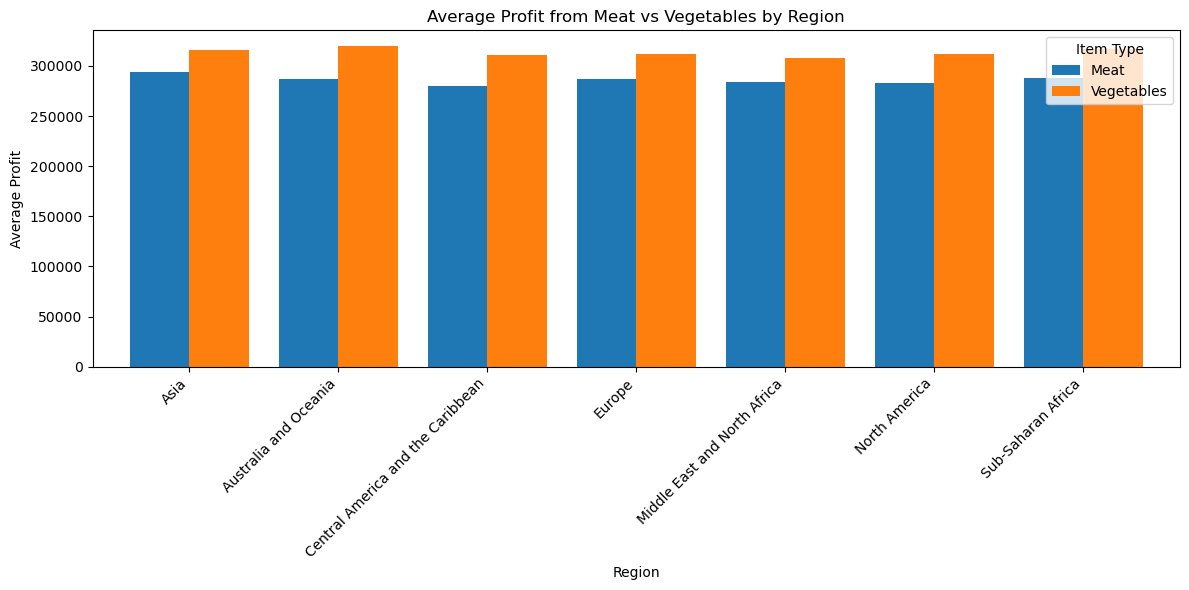

In [298]:
# Visualisation 
avg_profit_region.plot(
    kind='bar',
    figsize=(12,6),
    width=0.8
)
plt.title('Average Profit from Meat vs Vegetables by Region')
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()

Based on the calculated average total profit, vegetables generate higher average profit than meat in every region, with this pattern remaining consistent across the dataset. This indicates that vegetable sales are more profitable on average, although the underlying drivers such as: pricing, costs or volume sold cannot be determined from this analysis alone.

### v) What has been the total revenue from meat vs. vegetables for each year since 2012?

In [299]:
# Filter for year since 2012
df['Year'] = df['Order Date'].dt.year

In [300]:
# Items to analyse 
veg_meat = df[df['Item Type'].isin(['Meat', 'Vegetables'])]

In [301]:
# Calculate the revenue by year 
revenue_by_year = (
    veg_meat[veg_meat['Year'] >= 2012]
    .groupby(['Year', 'Item Type'], observed=True)['Total Revenue']
    .sum()
    .unstack()
    .round(2)
)

revenue_by_year.style.format("{:,.0f}")

Item Type,Meat,Vegetables
Year,,
2012,"4,695,307,470","1,711,481,195"
2013,"4,682,713,209","1,734,014,935"
2014,"4,625,636,555","1,689,093,196"
2015,"4,718,855,260","1,698,414,596"
2016,"4,726,460,249","1,698,639,832"
2017,"2,606,744,400","964,613,567"


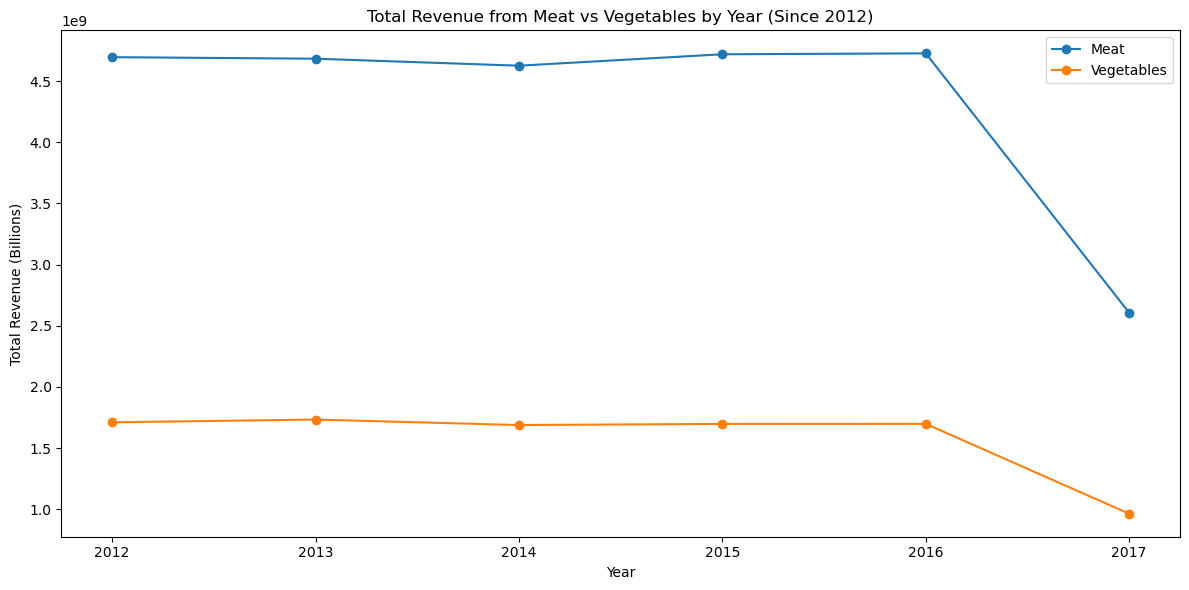

In [302]:
# Visualisation 
plt.figure(figsize=(12,6))
plt.plot(revenue_by_year.index, revenue_by_year['Meat'], marker='o', label='Meat')
plt.plot(revenue_by_year.index, revenue_by_year['Vegetables'], marker='o', label='Vegetables')

plt.title('Total Revenue from Meat vs Vegetables by Year (Since 2012)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Billions)')
plt.legend()
plt.tight_layout()
plt.show()

Total revenue from meat and vegetables was aggregated by year from 2012 onwards. The line chart shows that meat consistently generates higher total revenue than vegetables across all years, despite year-to-year fluctuations. Both item types experience a notable decline in revenue in 2017.

### vi) Plot a graph of the average revenue from meats and vegetables for any 12-month period in the dataset.

In [303]:
# Check the earliest and latest dates. 
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2017-07-29 00:00:00'))

We will use 2016 for the 12 month period. 

In [304]:
# Select the time and items to use for visualisation 
period_12m = df[
    (df['Order Date'].dt.year == 2016) &
    (df['Item Type'].isin(['Meat', 'Vegetables']))
].copy()

period_12m['Month'] = period_12m['Order Date'].dt.month

In [305]:
# Monthly average revenue 
avg_rev_12m = (
    period_12m
    .groupby(['Month', 'Item Type'], observed=True)['Total Revenue']
    .mean()
    .reset_index()
)

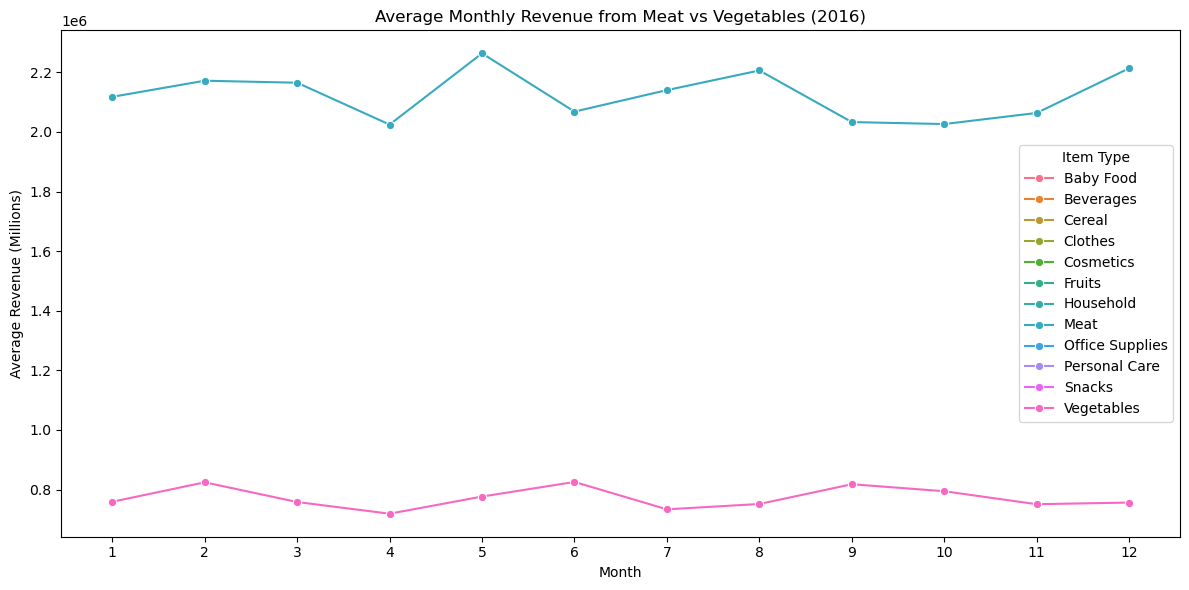

In [306]:
#Visualisation 

plt.figure(figsize=(12,6))
sns.lineplot(
    data=avg_rev_12m,
    x='Month',
    y='Total Revenue',
    hue='Item Type',
    marker='o'
)

plt.title('Average Monthly Revenue from Meat vs Vegetables (2016)')
plt.xlabel('Month')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

Average monthly revenue for meat and vegetables was analysed for the 2016 calendar year. Meat consistently records higher average revenue than vegetables across all months, with both item types showing similar seasonal fluctuations.


### vii) What is the average units sold for each item in the dataset (not just meat and vegetables) by region? Is vegetables or meats units sold above the overall mean for units sold?

In [307]:
# Average units sold for each item by region
avg_units_item_region = (
    df
    .groupby(['Region', 'Item Type'], observed=True)['Units Sold']
    .mean()
    .unstack()
    .round(2)
)
avg_units_item_region

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,4916.80,4952.76,4937.81,5016.40,4978.91,4946.79,4963.59,5141.13,5015.43,5018.20,4915.22,4999.77
Australia and Oceania,5138.36,4978.18,5096.63,4983.99,5036.98,4944.19,4947.93,5009.91,4955.66,4980.20,4988.26,5061.70
Central America and the Caribbean,5005.56,5053.24,4862.79,5011.96,5000.33,4929.55,5074.26,4888.94,4911.33,5077.04,5014.37,4931.67
Europe,4967.52,5093.21,4926.81,4966.51,4995.19,5027.38,5044.88,5022.79,5073.69,5007.51,5053.89,4942.72
Middle East and North Africa,5056.81,5027.56,4963.09,5045.12,4957.34,5080.83,4972.89,4966.56,4995.21,5083.26,5025.91,4878.58
North America,4817.45,5047.62,4740.76,4895.28,5241.45,5139.78,4824.64,4949.92,5176.61,5121.48,4793.68,4941.70
Sub-Saharan Africa,5013.47,4973.29,5033.97,4931.56,4987.85,5031.44,5008.43,5030.40,5011.84,5024.97,5075.71,5023.92


In [308]:
# Overall mean units sold 
overall_mean_units = df['Units Sold'].mean()
overall_mean_units

np.float64(5002.166067840564)

In [309]:
# Avg units sold for Meat & Veg
veg_meat_avg_units = (
    df[df['Item Type'].isin(['Meat', 'Vegetables'])]
    .groupby('Item Type', observed=True)['Units Sold']
    .mean()
    .round(2)
)

veg_meat_avg_units

Item Type
Meat          5018.03
Vegetables    4972.39
Name: Units Sold, dtype: float64

In [ ]:
# Compare the overall mean to meats and veg

veg_meat_above_mean = veg_meat_avg_units > overall_mean_units
veg_meat_above_mean

Item Type
Meat           True
Vegetables    False
Name: Units Sold, dtype: bool

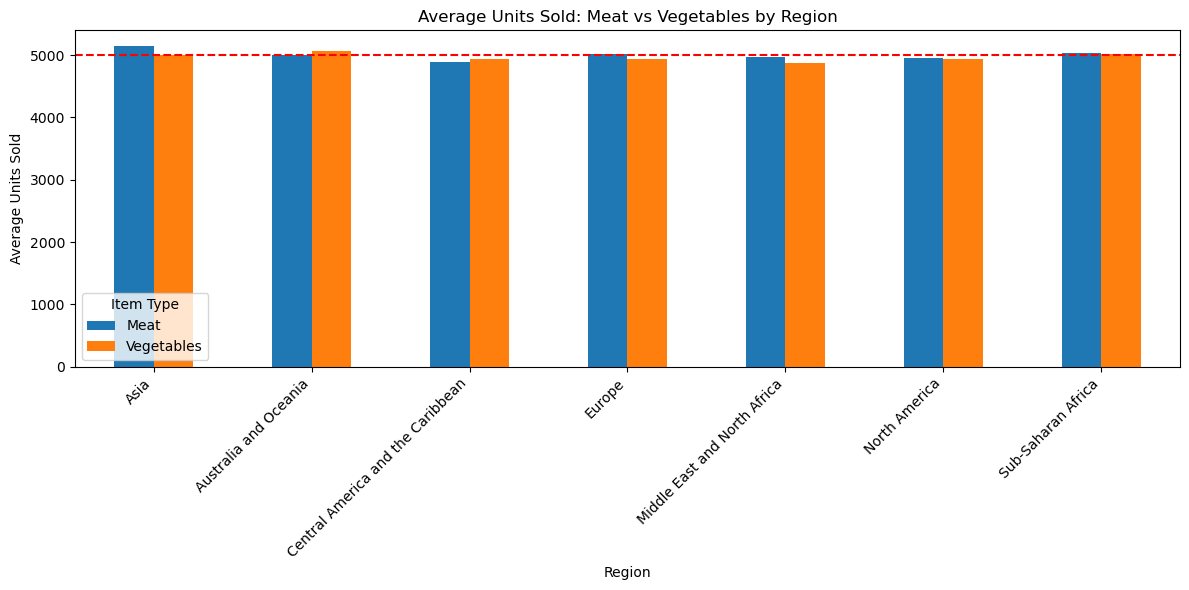

In [ ]:
#Visualisation for meat and vegetables 
avg_units_item_region[['Meat', 'Vegetables']].plot(kind='bar', figsize=(12,6))

plt.axhline(
    y=overall_mean_units,
    color='red',
    linestyle='--',
    label='Overall Mean Units Sold'
)

plt.title('Average Units Sold: Meat vs Vegetables by Region')
plt.xlabel('Region')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

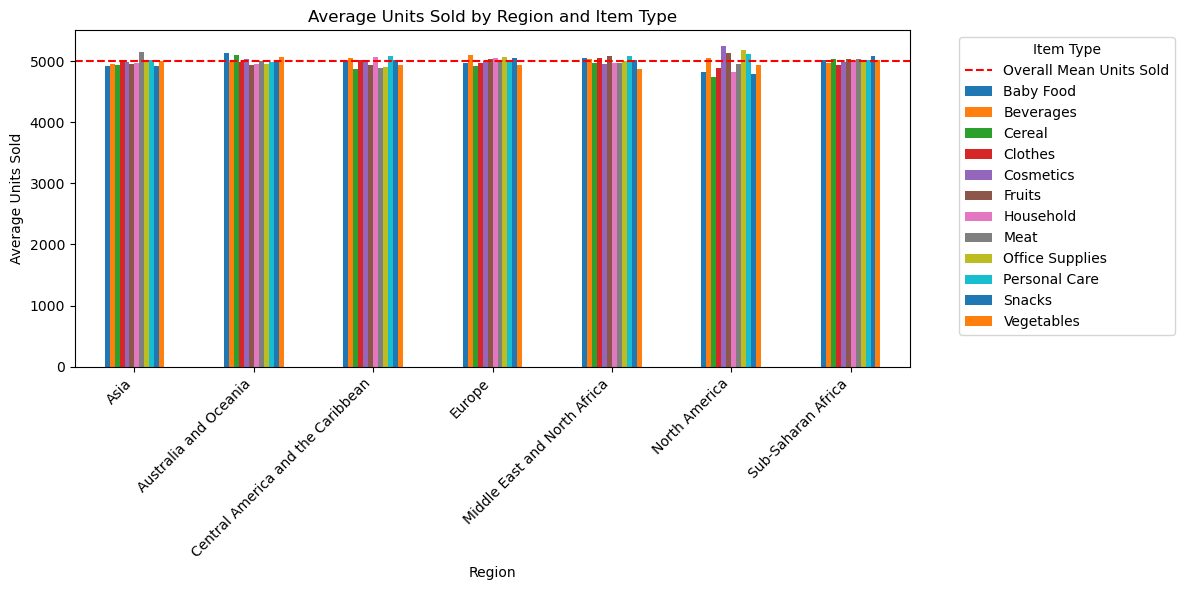

In [314]:
# Visualisation for all items in the dataset.
avg_units_item_region.plot(kind='bar', figsize=(12,6))

plt.axhline(
    y=overall_mean_units,
    color='red',
    linestyle='--',
    label='Overall Mean Units Sold'
)

plt.title('Average Units Sold by Region and Item Type')
plt.xlabel('Region')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Average units sold were calculated for each item type by region. The overall mean units sold was used as a baseline for comparison. 

Based on the computed averages, meat has an average units sold value of 5018.03 which is above the overall mean, while vegetables have an average units sold value of 4,972.39, which is below the overall mean. 

This indicates that meat is sold in higher average quantities than vegetables across the dataset.

### viii) In which season (Spring, Summer, Autumn, Winter) do persons spend the most meat vs. vegetables?

In [189]:
# Meat and vegetables 
veg_meat = df[df['Item Type'].isin(['Meat', 'Vegetables'])].copy()

In [190]:
# Create the season column from the months 
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

veg_meat['Season'] = veg_meat['Order Date'].dt.month.apply(month_to_season)

In [193]:
# Total spend by season for each type 
season_spend = (
    veg_meat
    .groupby(['Season', 'Item Type'], observed=True)['Total Revenue']
    .sum()
    .unstack()
    .round(2)
)

season_spend.style.format("{:,.0f}")

Item Type,Meat,Vegetables
Season,,
Autumn,"8,247,984,517","2,928,869,786"
Spring,"9,413,870,360","3,444,939,820"
Summer,"8,952,949,206","3,310,337,444"
Winter,"8,740,018,370","3,244,414,245"


In [194]:
# identify top season for meat and vegetables 
top_meat_season = season_spend['Meat'].idxmax()
top_veg_season = season_spend['Vegetables'].idxmax()

top_meat_season, top_veg_season

('Spring', 'Spring')

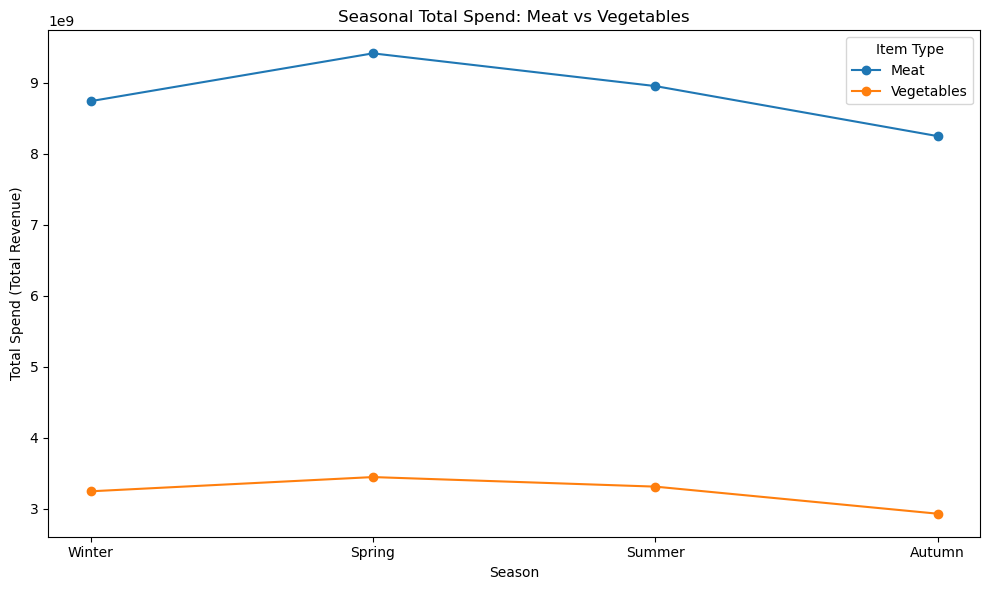

In [201]:
# Visualisation 
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_spend_ord = season_spend.loc[season_order]

plt.figure(figsize=(10,6))
plt.plot(season_spend_ord.index, season_spend_ord['Meat'], marker='o', label='Meat')
plt.plot(season_spend_ord.index, season_spend_ord['Vegetables'], marker='o', label='Vegetables')

plt.title('Seasonal Total Spend: Meat vs Vegetables')
plt.xlabel('Season')
plt.ylabel('Total Spend (Total Revenue)')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()


Total spending was measured using total revenue and aggregated by season for meat and vegetables. Based on the calculated values, Spring records the highest spending for both meat and vegetables. Although spending varies across seasons, meat consistently generates higher total spend than vegetables in every season.

# Task II

## a) When is the best time to open the franchise given that their primary products are meat and vegetables?

### Recommendation 

Spring is the most suitable time to open the franchise.

The analysis shows that spending on both meat and vegetables is highest during Spring, making it the most economically favourable period to begin operations. Opening during this season aligns the franchise with historically strong purchasing behaviour, which can help support early sales and revenue growth.

Although the dataset does not include direct measures of Covid-19 sentiment or consumer confidence, the observed spending patterns provide a useful baseline for identifying periods of higher demand. In a post-Covid environment, launching during a season with more stable and consistent consumer spending reduces risk and improves the likelihood of a successful market entry.

### Evidence from the analysis

The seasonal analysis shows that Spring has the highest total spending for both meat and vegetables. This result was confirmed by aggregating total revenue by season, where Spring consistently ranked highest for both product categories. The multi-series line chart also highlights clear spending peaks for meat and vegetables during Spring when compared to the other seasons.

## b) Which country/region provides the best opportunity for profit maximization based on the data analysed?

### Recommendation 

Focus on high-revenue regions, particularly Europe and Asia, with an emphasis on vegetable-based products.

The analysis shows that vegetables generate higher average profit than meat across all regions, and that Europe and Asia consistently record strong revenue levels. This suggests that these regions benefit from a combination of high sales volumes and stable purchasing demand, which supports stronger overall profitability.

By prioritising vegetable offerings in regions with large and active markets, or in high-spending countries within these regions, the franchise is more likely to maximise returns based on the purchasing patterns and profit trends observed in the data.

### Evidence from the analysis

Vegetables are consistently more profitable across the dataset, as shown in the average profit by region table and corresponding grouped bar chart, where vegetables record higher average profit than meat in every region. In addition, the regional revenue analysis table shows that Europe and Asia consistently record high overall revenue levels for both meat and vegetables, suggesting strong and sustained demand in these regions.

At the country level, the vegetable spending by country output identifies Uzbekistan as the highest vegetable-spending country, highlighting the potential value of country-specific targeting within high-performing regions.


## c) Are there any limitations, ethical issues to declare in relation to your results or analysis?

### Limitations

This analysis is based on past sales data and does not include direct information about Covid-19 sentiment or changes in consumer behaviour. Because of this, the results reflect historical purchasing behaviour and may not fully represent how customers behave in a post-Covid environment. In addition, profit comparisons are based on total profit values and do not break down costs in detail, which limits how much can be said about why vegetables are more profitable than meat.

### Ethical Considerations 

The results should not be used to make broad assumptions about consumer behaviour across entire regions or countries, as buying habits can vary widely within the same area. The findings should also not be interpreted as promoting increased meat consumption, especially given environmental and health concerns linked to meat production. Any expansion decisions should consider sustainability, local laws, and responsible business practices alongside profit goals.